In [2]:
# importing the used Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [3]:
# importing the DataFrame
df = pd.read_csv("car_price_prediction_.csv")

In [4]:
df.head(20)

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,1,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,2,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,3,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,4,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,5,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang
5,6,Audi,2019,2.4,Diesel,Automatic,246553,Like New,88969.76,Q7
6,7,Audi,2020,4.0,Electric,Automatic,135486,Used,63498.75,Q5
7,8,Tesla,2017,5.3,Hybrid,Automatic,83030,New,17381.19,Model Y
8,9,Honda,2023,5.7,Electric,Manual,120360,Like New,15905.62,Civic
9,10,Ford,2010,1.5,Electric,Automatic,135009,Like New,9560.22,Explorer


In [5]:
null_counts = df.isnull().sum()

In [6]:
null_counts

Car ID          0
Brand           0
Year            0
Engine Size     0
Fuel Type       0
Transmission    0
Mileage         0
Condition       0
Price           0
Model           0
dtype: int64

In [7]:
print(df.describe())

           Car ID       Year  Engine Size        Mileage         Price
count  2500.00000  2500.0000  2500.000000    2500.000000   2500.000000
mean   1250.50000  2011.6268     3.465240  149749.844800  52638.022532
std     721.83216     6.9917     1.432053   87919.952034  27295.833455
min       1.00000  2000.0000     1.000000      15.000000   5011.270000
25%     625.75000  2005.0000     2.200000   71831.500000  28908.485000
50%    1250.50000  2012.0000     3.400000  149085.000000  53485.240000
75%    1875.25000  2018.0000     4.700000  225990.500000  75838.532500
max    2500.00000  2023.0000     6.000000  299967.000000  99982.590000


In [8]:
unique_brands = df['Brand'].unique()
print(unique_brands)

['Tesla' 'BMW' 'Audi' 'Ford' 'Honda' 'Mercedes' 'Toyota']


In [9]:
numeric_df = df.select_dtypes(include='number')

correlation_matrix = numeric_df.corr()
print(correlation_matrix)

               Car ID      Year  Engine Size   Mileage     Price
Car ID       1.000000  0.008050     0.000059 -0.035840  0.004650
Year         0.008050  1.000000     0.011833  0.002282 -0.036805
Engine Size  0.000059  0.011833     1.000000 -0.015782 -0.004420
Mileage     -0.035840  0.002282    -0.015782  1.000000 -0.008567
Price        0.004650 -0.036805    -0.004420 -0.008567  1.000000


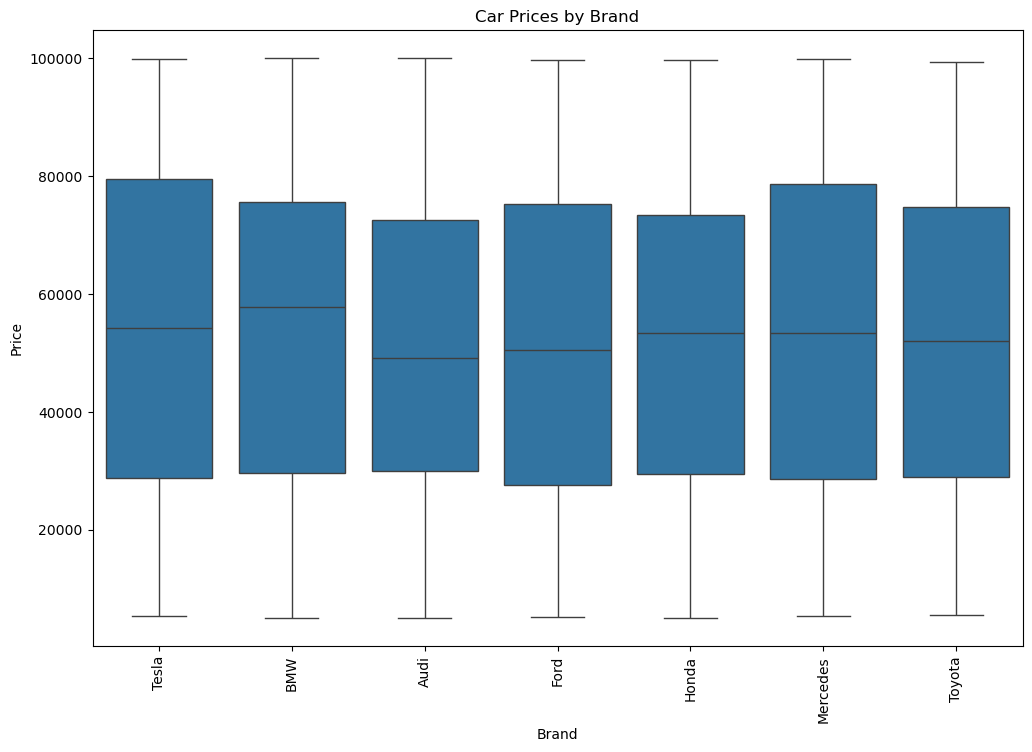

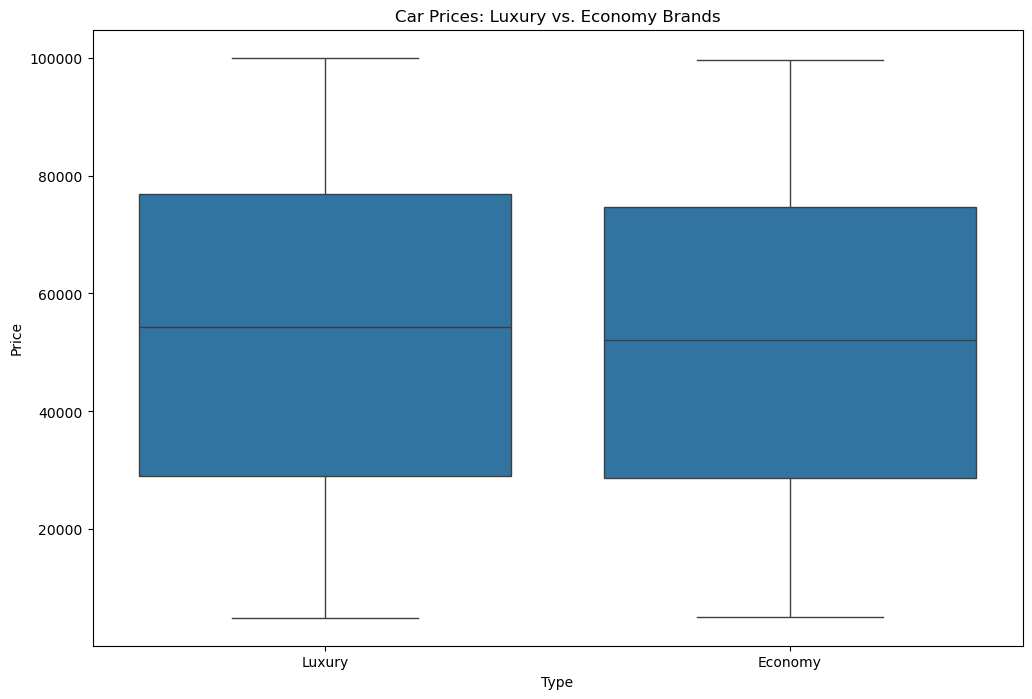

T-test statistic: 1.152661142356886
P-value: 0.2491597862307123
There is no significant difference in prices between luxury and economy brands.


In [10]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Brand', y='Price', data=df)
plt.xticks(rotation=90)
plt.title('Car Prices by Brand')
plt.xlabel('Brand')
plt.ylabel('Price')
plt.show()

luxury_brands = ['Mercedes', 'BMW', 'Audi', 'Tesla']
df['luxury'] = df['Brand'].apply(lambda x: 'Luxury' if x in luxury_brands else 'Economy')

plt.figure(figsize=(12, 8))
sns.boxplot(x='luxury', y='Price', data=df)
plt.title('Car Prices: Luxury vs. Economy Brands')
plt.xlabel('Type')
plt.ylabel('Price')
plt.show()


luxury_prices = df[df['luxury'] == 'Luxury']['Price']
economy_prices = df[df['luxury'] == 'Economy']['Price']

t_stat, p_val = ttest_ind(luxury_prices, economy_prices)

print(f'T-test statistic: {t_stat}')
print(f'P-value: {p_val}')

if p_val < 0.05:
    print("There is a significant difference in prices between luxury and economy brands.")
else:
    print("There is no significant difference in prices between luxury and economy brands.")


<Figure size 1200x800 with 0 Axes>

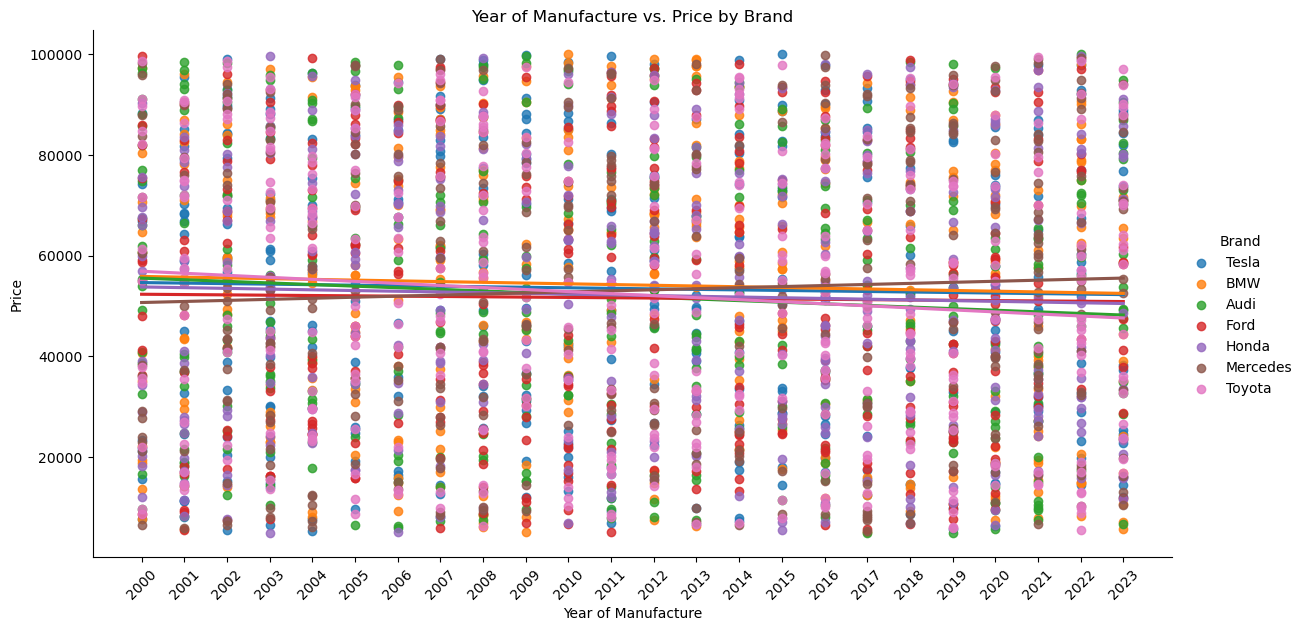

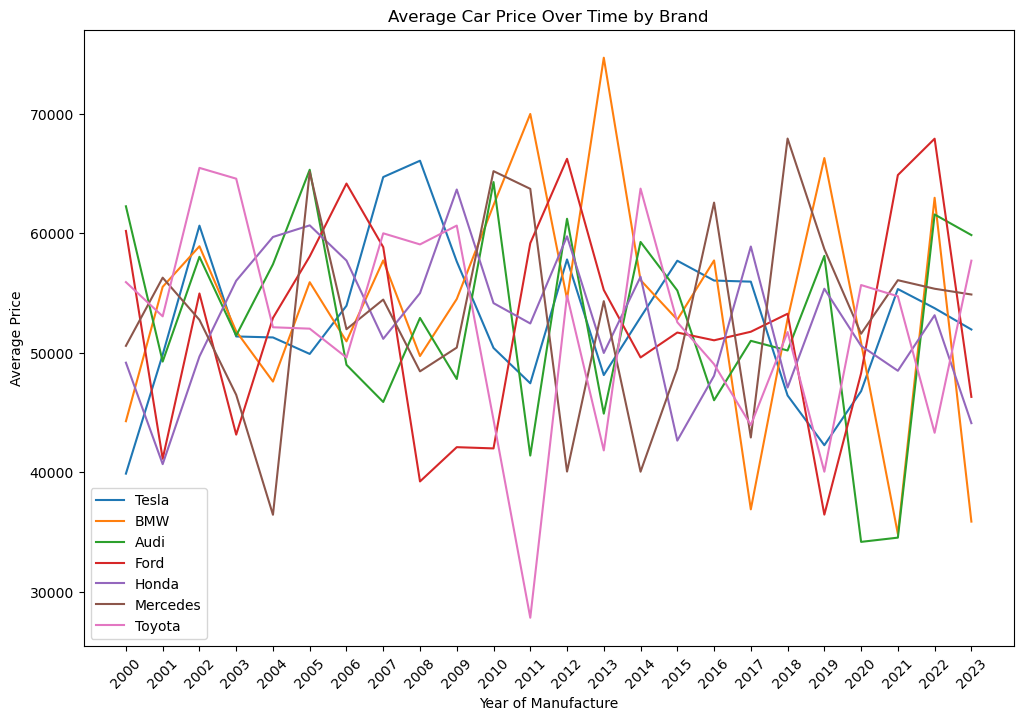

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and unique_brands is the list of unique brands
unique_brands = df['Brand'].unique()

# Creating a scatter plot with regression lines for Year of Manufacture vs. Price by Brand
plt.figure(figsize=(12, 8))
sns.lmplot(x='Year', y='Price', hue='Brand', data=df, aspect=2, height=6, ci=None, markers='o', palette='tab10')
plt.title('Year of Manufacture vs. Price by Brand')
plt.xlabel('Year of Manufacture')
plt.ylabel('Price')
plt.xticks(sorted(df['Year'].unique()), rotation=45)  # Rotate x-axis labels to 45 degrees and show every year
plt.show()

# Line plot for Average Car Price Over Time by Brand
plt.figure(figsize=(12, 8))
for brand in unique_brands:
    brand_data = df[df['Brand'] == brand]
    avg_price_per_year = brand_data.groupby('Year')['Price'].mean()
    plt.plot(avg_price_per_year.index, avg_price_per_year.values, label=brand)

plt.title('Average Car Price Over Time by Brand')
plt.xlabel('Year of Manufacture')
plt.ylabel('Average Price')
plt.xticks(sorted(df['Year'].unique()), rotation=45)  # Rotate x-axis labels to 45 degrees and show every year
plt.legend()
plt.show()


# We can figure out from the previous plot the depreciation of car prices over time.
# There are notable trends for specific brands.

### Tesla's Stock Price Drop in 2019

Tesla's stock price has generally varied around the average over the years, but there was a noticeable sudden drop in 2019. The decline was primarily due to a combination of factors:

1. **Disappointing Earnings Report**:
   - Tesla reported a wider-than-expected loss and weaker-than-expected revenue for the second quarter of 2019.
   - This led to a significant decline in investor confidence.

2. **Departure of CTO JB Straubel**:
   - During the earnings call, CEO Elon Musk announced that Chief Technology Officer and co-founder JB Straubel was moving to an advisory role.
   - This added to the uncertainty and concern among investors.

3. **Market Sentiment**:
   - The overall market sentiment towards electric vehicle (EV) stocks was also affected by broader economic concerns and trade tensions at the time.

These factors combined to create a perfect storm, resulting in Tesla's stock experiencing its worst day of the year on July 25, 2019, with a 13.6% drop in prices.

### Price Trendsrices beginning in 2011.

**BMW**:
- Remained relatively average in prices from 2000 till 2008.
- Began to rise significantly in 2008.
- Saw a decrease once again in 2011.
- Reached a peak price in 2013, which can be considered the highest among all seven brands.
- Prices varied around the aver

Audi was varying around the average through out the years but there a noticeable decrease in prices from 2020 to 2021:
### Factors Behind the Decrease in Audi Prices (2020-2021)

1. **COVID-19 Pandemic Impact**
   - Economic uncertainty led to reduced consumer spending and lower demand for luxury cars.
   - Factory shutdowns disrupted production, causing delays and oversupply.
   - Inventory backlog led to price reductions to clear older stock.

2. **Supply Chain Disruptions**
   - Global semiconductor shortage slowed down production.
   - Logistics and transportation challenges affected pricing strategies.

3. **Decreased Demand for Luxury Cars**
   - Consumers shifted spending priorities away from luxury items.
   - Increased demand for used cars led to more incentives and price reductions for new cars.

4. **Incentives and Financing Offers**
   - Aggressive financing offers and discounts to stimulate demand.

5. **Transition to Electric Vehicles (EVs)**
   - Push to sell off older gas-powered models with price reductions.
a**Toyota**:
- Experienced a notable decrease in prices from 2009 to 2011.
- Started to rise again in prices beginning in 2011.ge starting from 2014 onwards.
 onwards.
verage again starting from 2014



In [12]:

df.columns


Index(['Car ID', 'Brand', 'Year', 'Engine Size', 'Fuel Type', 'Transmission',
       'Mileage', 'Condition', 'Price', 'Model', 'luxury'],
      dtype='object')

In [14]:
print(df)

      Car ID   Brand  Year  Engine Size Fuel Type Transmission  Mileage  \
0          1   Tesla  2016          2.3    Petrol       Manual   114832   
1          2     BMW  2018          4.4  Electric       Manual   143190   
2          3    Audi  2013          4.5  Electric       Manual   181601   
3          4   Tesla  2011          4.1    Diesel    Automatic    68682   
4          5    Ford  2009          2.6    Diesel       Manual   223009   
...      ...     ...   ...          ...       ...          ...      ...   
2495    2496    Audi  2020          2.4    Petrol    Automatic    22650   
2496    2497    Audi  2001          5.7    Hybrid       Manual    77701   
2497    2498    Ford  2021          1.1    Hybrid       Manual   272827   
2498    2499    Audi  2002          4.5    Diesel       Manual   229164   
2499    2500  Toyota  2005          4.6    Diesel    Automatic    80978   

     Condition     Price     Model   luxury  
0          New  26613.92   Model X   Luxury  
1      

In [15]:
df_new = df[['Brand', 'Price']]

In [16]:
df_new

,Brand,Price
0,Tesla,26613.92
1,BMW,14679.61
2,Audi,44402.61
3,Tesla,86374.33
4,Ford,73577.10
...,...,...
2495,Audi,61384.10
2496,Audi,24710.35
2497,Ford,29902.45
2498,Audi,46085.67


In [17]:
grouped_df = df_new.groupby('Brand')['Price'].mean()
print(grouped_df)

Brand
Audi        51953.424810
BMW         54157.114385
Ford        51593.254813
Honda       52050.283949
Mercedes    53191.090085
Tesla       53475.547471
Toyota      52078.728235
Name: Price, dtype: float64


In [18]:
grouped_df.max()

54157.11438547486

In [19]:
grouped_df_max = df_new.groupby('Brand')['Price'].max()
print(grouped_df_max)

Brand
Audi        99982.59
BMW         99968.62
Ford        99605.33
Honda       99578.74
Mercedes    99754.42
Tesla       99905.90
Toyota      99400.47
Name: Price, dtype: float64


In [20]:
grouped_df_max.max()

99982.59

In [21]:
df_fuel = df[['Fuel Type', 'Price']]

In [22]:
df_fuel

,Fuel Type,Price
0,Petrol,26613.92
1,Electric,14679.61
2,Electric,44402.61
3,Diesel,86374.33
4,Diesel,73577.10
...,...,...
2495,Petrol,61384.10
2496,Hybrid,24710.35
2497,Hybrid,29902.45
2498,Diesel,46085.67


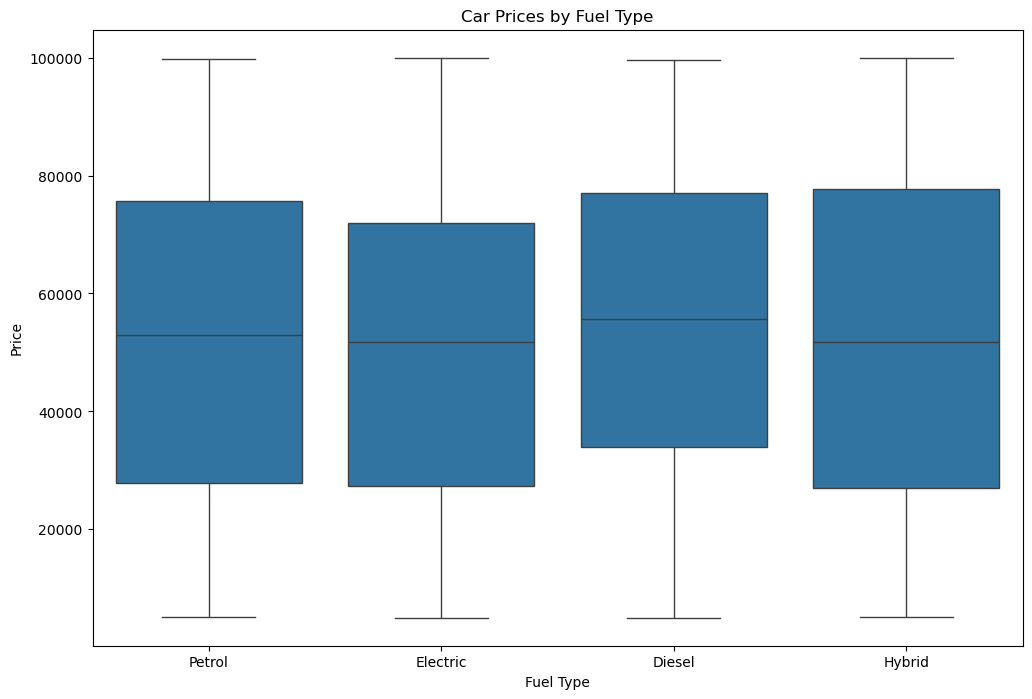

In [23]:
# Plotting the relationship between Fuel Type and Price
plt.figure(figsize=(12, 8))
sns.boxplot(x='Fuel Type', y='Price', data=df_fuel)
plt.title('Car Prices by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.show()


### Fuel Type vs. Prices

We can observe that the highest average prices are for diesel cars, followed by petrol. Electric and hybrid cars have approximately the same average price.

- **Diesel**: 
  - Diesel cars have the highest average price.
  - Diesel cars start from above $35,000, indicating that there are no diesel cars below this price point.
  
- **Petrol**: 
  - Petrol cars follow diesel in terms of average price.
  
- **Electric and Hybrid**: 
  - Electric and hybrid cars have similar average prices.
  - Hybrid cars share the lowest prices with electric and petrol cars.
  
We can also conclude that:
  - The highest priced cars are either diesel or hybrid.
  - The lowest prices are found among hybrid, electric, and petrol cars.


In [24]:
df_engine = df[['Engine Size', 'Price']]

In [25]:
df_engine

,Engine Size,Price
0,2.3,26613.92
1,4.4,14679.61
2,4.5,44402.61
3,4.1,86374.33
4,2.6,73577.10
...,...,...
2495,2.4,61384.10
2496,5.7,24710.35
2497,1.1,29902.45
2498,4.5,46085.67


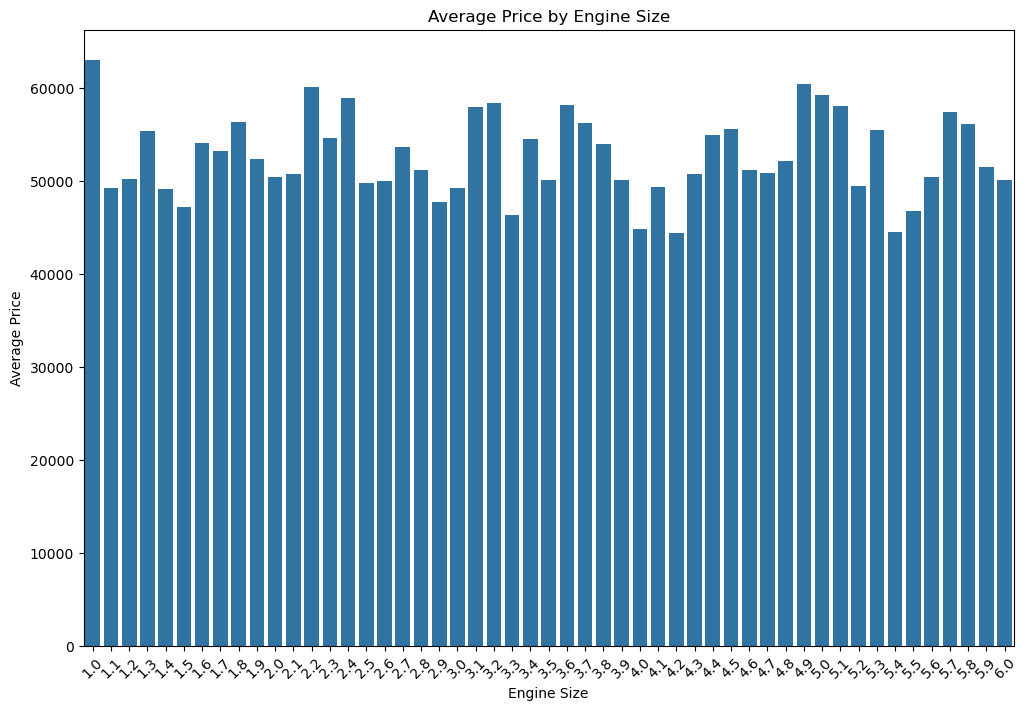

In [30]:
avg_price_by_engine_size = df_engine.groupby('Engine Size')['Price'].mean().reset_index()


plt.figure(figsize=(12, 8))
sns.barplot(x='Engine Size', y='Price', data=avg_price_by_engine_size)
plt.title('Average Price by Engine Size')
plt.xlabel('Engine Size')
plt.ylabel('Average Price')
plt.xticks(rotation=45)  # Rotate x-axis labels to 45 degrees
plt.show()


### Engine Size vs. Prices

**What does engine size mean?**
Engine size, engine capacity, and engine displacement all refer to the total volume of the cylinders in the engine. This is usually expressed in litres or cubic centimetres (cc). Engine size isn’t a measurement of the physical size of the engine – although a larger engine size will often result in a physically bigger engine.

**What difference does engine size make?**
Engine size can have a big impact on the performance and fuel economy of an engine, and that’s for one main reason. With a larger engine size, there’s more space for air and fuel to mix in each of the cylinders. Air and fuel, when ignited in the engine, produce the power needed to turn the wheels. With more air and fuel in each cylinder, more power can be produced. Therefore, a car with a 4.0-litre engine would typically make more power than a car with a 2.0-litre engine. More power usually translates to a faster car.

**How important is engine size?**
Generally speaking, engine size is no longer massively important for modern cars, thanks to turbocharging and hybrid systems. It can be a quick way to assume how powerful an engine is – for example, a 5.0-litre engine will nearly always be more powerful than a 2.0-litre engine. But this is not a hard and fast rule, often breaking down when comparing engines that are closer in size – for example, a 1.8-litre engine versus a 2.0-litre engine.

We can see that there isn't a very significant difference in the prices, but we can find the highest price averages in the 1.0 engines.
neses 